<a href="https://colab.research.google.com/github/Harsh813203/ipl_match_analysis/blob/master/IPL_match_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IPL Match Analysis and Prediction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
##load the dataset
match_df = pd.read_csv('/content/matches.csv')
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
divr_df = pd.read_csv('/content/deliveries.csv')
divr_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
divr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20736 entries, 0 to 20735
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          20736 non-null  int64  
 1   inning            20736 non-null  int64  
 2   batting_team      20736 non-null  object 
 3   bowling_team      20736 non-null  object 
 4   over              20736 non-null  int64  
 5   ball              20736 non-null  int64  
 6   batsman           20736 non-null  object 
 7   non_striker       20736 non-null  object 
 8   bowler            20736 non-null  object 
 9   is_super_over     20736 non-null  int64  
 10  wide_runs         20735 non-null  float64
 11  bye_runs          20735 non-null  float64
 12  legbye_runs       20735 non-null  float64
 13  noball_runs       20735 non-null  float64
 14  penalty_runs      20735 non-null  float64
 15  batsman_runs      20735 non-null  float64
 16  extra_runs        20735 non-null  float6

# Exploratory Data Analysis

In [ ]:
match_df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [ ]:
match_df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

In [ ]:
##checking for missing value
match_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
##checking null value
match_df[match_df['winner'].isnull()== True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [ ]:
##replacing null results
match_df['winner'].fillna('Draw',inplace = True)

In [ ]:
match_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
team_encodings = {
    'Mumbai Indians': 1,
    'Kolkata Knight Riders': 2,
    'Royal Challengers Bangalore': 3,
    'Deccan Chargers': 4,
    'Chennai Super Kings': 5,
    'Rajasthan Royals': 6,
    'Delhi Daredevils'       :      7,
    'Gujarat Lions'    :         8,
    'Kings XI Punjab'         :        9,
    'Sunrisers Hyderabad'      :             10,
    'Rising Pune Supergiants'   :              11,
    'Rising Pune Supergiant'   :       11,
    'Kochi Tuskers Kerala'   :       12,
    'Pune Warriors': 13,
    'Delhi Capitals':14,
    'Draw':15
}
team_encode_dict = {
    'team1': team_encodings,
    'team2' : team_encodings,
    'toss_winner' : team_encodings,
    'winner': team_encodings
}
match_df.replace(team_encode_dict, inplace = True)
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,2,1,1,field,normal,0,1,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,5,1,5,bat,normal,0,1,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,10,14,14,field,normal,0,14,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,14,5,5,field,normal,0,5,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
#missing values in city column
match_df['city'].value_counts()


Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Port Elizabeth      7
Cape Town           7
Ranchi              7
Abu Dhabi           7
Cuttack             7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [ ]:
match_df[match_df['city'].isnull()== True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [ ]:
match_df['city'].fillna('Dubai',inplace = True)
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    int64 
 5   team2            756 non-null    int64 
 6   toss_winner      756 non-null    int64 
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    int64 
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
match_df.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,5.554233,5.604497,5.462963,0.025132,5.416667,13.283069,3.350529
std,3464.478148,3.366895,3.389656,3.411850,3.361638,0.156630,3.421736,23.471144,3.387963
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,2016.000000,9.000000,8.000000,8.000000,0.000000,8.000000,19.000000,6.000000
max,11415.000000,2019.000000,14.000000,14.000000,14.000000,1.000000,15.000000,146.000000,10.000000


# **Toss win and match wins by each team**

In [ ]:
toss_wins = match_df['toss_winner'].value_counts(sort = True)
match_wins = match_df['winner'].value_counts(sort = True)
print("List of total number of toss wins by each team:-\n")
for idx, val in toss_wins.iteritems():
  print(f"{list(team_encode_dict['winner'].keys())[idx - 1]}-> {toss_wins[idx]}")


List of total number of toss wins by each team:-

Mumbai Indians-> 98
Kolkata Knight Riders-> 92
Chennai Super Kings-> 89
Kings XI Punjab-> 81
Royal Challengers Bangalore-> 81
Delhi Daredevils-> 80
Rajasthan Royals-> 80
Sunrisers Hyderabad-> 46
Deccan Chargers-> 43
Kochi Tuskers Kerala-> 20
Gujarat Lions-> 15
Rising Pune Supergiants-> 13
Pune Warriors-> 10
Rising Pune Supergiant-> 8


In [ ]:
match_wins = match_df['winner'].value_counts(sort = True)
match_wins
print("List of total number of matches wins by each team:- \n")
for idx, val in toss_wins.iteritems():
  print(f"{list(team_encode_dict['winner'].keys())[idx - 1]}-> {match_wins[idx]}")


List of total number of matches wins by each team:- 

Mumbai Indians-> 109
Kolkata Knight Riders-> 92
Chennai Super Kings-> 100
Kings XI Punjab-> 82
Royal Challengers Bangalore-> 84
Delhi Daredevils-> 67
Rajasthan Royals-> 75
Sunrisers Hyderabad-> 58
Deccan Chargers-> 29
Kochi Tuskers Kerala-> 12
Gujarat Lions-> 13
Rising Pune Supergiants-> 15
Pune Warriors-> 10
Rising Pune Supergiant-> 6


In [ ]:
toss_wins.iteritems

<bound method Series.iteritems of 1     98
2     92
5     89
9     81
3     81
7     80
6     80
10    46
4     43
13    20
8     15
11    13
14    10
12     8
Name: toss_winner, dtype: int64>

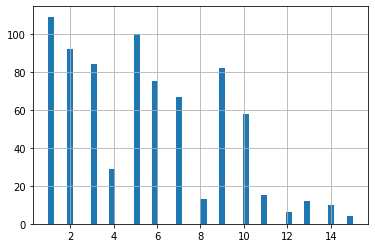

In [ ]:
match_df['winner'].hist(bins = 50)


Text(0.5, 1.0, 'Match winners')

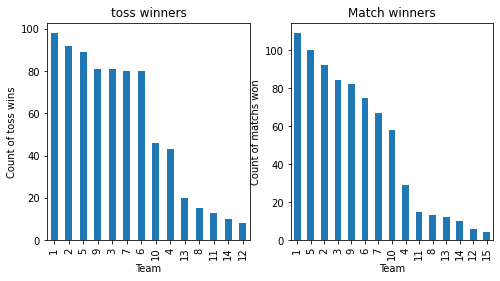

In [ ]:
fig = plt.figure(figsize= (8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Team")
ax1.set_ylabel("Count of toss wins")
ax1.set_title("toss winners")
toss_wins.plot(kind = 'bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of matchs won')
ax2.set_title('Match winners')

In [ ]:
match_df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

##Dropping the redundant **columns**

In [ ]:
match_df = match_df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
match_df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3
...,...,...,...,...,...,...,...
751,2,1,Mumbai,field,1,Wankhede Stadium,1
752,5,1,Chennai,bat,5,M. A. Chidambaram Stadium,1
753,10,14,Visakhapatnam,field,14,ACA-VDCA Stadium,14
754,14,5,Visakhapatnam,field,5,ACA-VDCA Stadium,5


# **Data Prepartion**
Encoding all the remaining features


*  City
*  toss_decision
*  venue











In [ ]:
#using the label encoder
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city','toss_decision','venue']
encoder = LabelEncoder()
for ftr in ftr_list:
  match_df[ftr]= encoder.fit_transform(match_df[ftr])
  print(encoder.classes_)
match_df

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
[0 1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,3,7,2,0,3,17,3
...,...,...,...,...,...,...,...
751,2,1,24,1,1,40,1
752,5,1,8,0,5,18,1
753,10,14,32,1,14,0,14
754,14,5,32,1,5,0,5


# **Machine Learning**

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(match_df,test_size = 0.2, random_state = 5)
print(train_df.shape)
print(test_df.shape)

(604, 7)
(152, 7)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def print_model_scores(model,data,predictor,target):
  model.fit(data[predictor],data[target])
  predictions = model.predict(data[predictor])
  accuracy = accuracy_score(predictions,data[target])
  print('Accuracy: %s' % '{0:.2}'.format(accuracy))
  scores = cross_val_score(model, data[predictor], data[target],scoring = "neg_mean_squared_error",cv=5)
  print('Cross-Validation Scores: {}'.format(np.sqrt(-scores)))
  print(f'Average RMSE: {np.sqrt(-scores).mean()}')

In [ ]:
#logistic regression
target_var = ["winner"]
predictor_var = ['team1','team2','venue','toss_winner','city','toss_decision']
model = LogisticRegression()
print_model_scores(model,train_df,predictor_var,target_var)

Accuracy: 0.32
Cross-Validation Scores: [3.60211141 3.74165739 3.45932683 3.33526115 3.63776488]
Average RMSE: 3.555224332732571


# **Random Forest Classifier**

In [ ]:
##random forest classifier
model = RandomForestClassifier(n_estimators=100)
print_model_scores(model,train_df,predictor_var,target_var)

Accuracy: 0.89
Cross-Validation Scores: [3.78993883 3.7691659  3.49970483 3.33402197 3.9019226 ]
Average RMSE: 3.6589508261729256


# **Sample Prediction**

In [ ]:
team1='Mumbai Indians'
team2='Sunrisers Hyderabad'
toss_winner='Sunrisers Hyderabad'
inp = [team_encode_dict['team1'][team1],team_encode_dict['team2'][team2],'14',team_encode_dict['toss_winner'][toss_winner],'2','1']
print(inp)
inp = np.array(inp).reshape((1, -1))
print(inp)
output=model.predict(inp)
print(output)
print(f"The winner would be: {list(team_encodings.keys())[list(team_encode_dict['team1'].values()).index(output)]}")



[1, 10, '14', 10, '2', '1']
[['1' '10' '14' '10' '2' '1']]
[3]
The winner would be: Royal Challengers Bangalore


# **Feature Importance**

In [ ]:
pd.Series(index=predictor_var,data=model.feature_importances_)

team1            0.223674
team2            0.256661
venue            0.179424
toss_winner      0.153124
city             0.152483
toss_decision    0.034634
dtype: float64

# **Running model on unseen data**

In [ ]:
print_model_scores(model,test_df,predictor_var,target_var)

Accuracy: 0.98
Cross-Validation Scores: [3.77171134 2.63964807 2.38746728 4.11501316 3.082207  ]
Average RMSE: 3.1992093709793417


In [ ]:
match_df[match_df['winner'] == match_df['toss_winner']]

,team1,team2,city,toss_decision,toss_winner,venue,winner
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,3,7,2,0,3,17,3
5,8,10,15,1,10,28,10
...,...,...,...,...,...,...,...
750,5,9,23,1,9,14,9
751,2,1,24,1,1,40,1
753,10,14,32,1,14,0,14
754,14,5,32,1,5,0,5


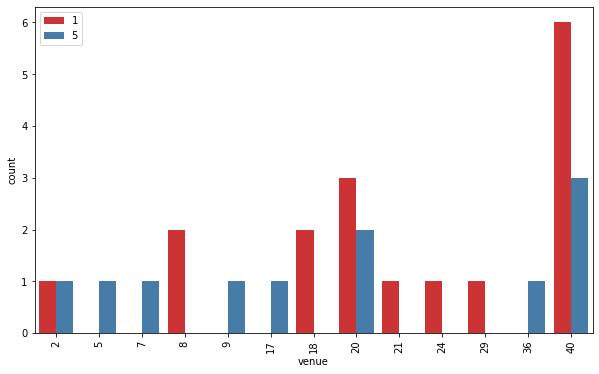

In [ ]:
import seaborn as sns
team1=team_encodings['Mumbai Indians']
team2=team_encodings['Chennai Super Kings']
mtemp=match_df[((match_df['team1']==team1)|(match_df['team2']==team1))&((match_df['team1']==team2)|(match_df['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp, palette='Set1')
plt.xticks(rotation='vertical')
leg = plt.legend( loc = 'upper left')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# **Taking it a step further: Adding Variables¶**

In [ ]:
batsman_grp = divr_df.groupby(['match_id', 'batting_team'])
batsmen = batsman_grp['batsman_runs'].sum().reset_index()
batsmen


,match_id,batting_team,batsman_runs
0,1,Royal Challengers Bangalore,166
1,1,Sunrisers Hyderabad,200
2,2,Mumbai Indians,176
3,2,Rising Pune Supergiant,183
4,3,Gujarat Lions,179
...,...,...,...
1505,11413,Sunrisers Hyderabad,162
1506,11414,Chennai Super Kings,151
1507,11414,Delhi Capitals,147
1508,11415,Chennai Super Kings,148


In [ ]:
match = pd.read_csv("/content/matches.csv")
match = match[match['winner'].isnull() != True]
teams = match.groupby(['id', 'team1', 'team2'])['winner'].sum().reset_index()
teams['id']

0          1
1          2
2          3
3          4
4          5
       ...  
747    11347
748    11412
749    11413
750    11414
751    11415
Name: id, Length: 752, dtype: int64

In [ ]:
teams

,id,team1,team2,winner
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
...,...,...,...,...
747,11347,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians
748,11412,Chennai Super Kings,Mumbai Indians,Mumbai Indians
749,11413,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals
750,11414,Delhi Capitals,Chennai Super Kings,Chennai Super Kings


In [ ]:
append_dict = {'match_id': list(teams['id']),
              'team1': list(teams['team2']),
              'team2': list(teams['team1']),
              'team1_score': [],
              'team2_score': [],
               'winner': list(teams['winner'])
              }

for match_id, team in zip(list(teams['id']), list(teams['team1'])):
    append_dict['team1_score'].append(int(batsmen.query('match_id == @match_id and batting_team == @team')['batsman_runs']))

for match_id, team in zip(list(teams['id']), list(teams['team2'])):
    append_dict['team2_score'].append(int(batsmen.query('match_id == @match_id and batting_team == @team')['batsman_runs']))
  
df = pd.DataFrame(append_dict)

In [ ]:

df

,match_id,team1,team2,team1_score,team2_score,winner
0,1,Royal Challengers Bangalore,Sunrisers Hyderabad,200,166,Sunrisers Hyderabad
1,2,Rising Pune Supergiant,Mumbai Indians,176,183,Rising Pune Supergiant
2,3,Kolkata Knight Riders,Gujarat Lions,179,169,Kolkata Knight Riders
3,4,Kings XI Punjab,Rising Pune Supergiant,157,154,Kings XI Punjab
4,5,Delhi Daredevils,Royal Challengers Bangalore,151,137,Royal Challengers Bangalore
...,...,...,...,...,...,...
747,11347,Mumbai Indians,Kolkata Knight Riders,133,134,Mumbai Indians
748,11412,Mumbai Indians,Chennai Super Kings,131,132,Mumbai Indians
749,11413,Delhi Capitals,Sunrisers Hyderabad,162,165,Delhi Capitals
750,11414,Chennai Super Kings,Delhi Capitals,147,151,Chennai Super Kings


In [ ]:

cols_to_use = match_df.columns.difference(df.columns)
cols_to_use

Index(['city', 'toss_decision', 'toss_winner', 'venue'], dtype='object')